In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from google.colab import files,drive
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.optimizers import Adam

# Old models

## Load data

In [30]:
# load total data

root_data = '/Users/danmarti/Documents/MRC_postdoc/Pangenomic/pangenome_analysis/ALL/phylo_analysis/PG_ANNs/data/'

df_x_tot = pd.read_csv(root_data + 'x_data_TOTAL.csv')
df_y_tot = pd.read_csv(root_data +'y_data_TOTAL.csv',
                       header=None)

# load partial data with selection of few genes
df_x = pd.read_csv(root_data + 'x_data_COG_worm.csv')
df_y = pd.read_csv(root_data + 'y_data_COG_worm.csv',
                   header=None)

In [4]:
df_x_tot

,Broadphenotype,FC_class,met0_class,met50_class,phylogroup,Worm_metf_0,Worm_metf_50,Bact_score_mean,Bact_score_sd,Mean_Bact_metf_0,...,zntR,znuA_2~~~znuA~~~znuA_1,znuB,znuC,zraP,zraR~~~zraR_1~~~zraR_2,zraS,zupT,zur,zwf
0,Laboratorystrain,low,medium,low,A,2154.377506,2822.435605,1.534368,0.152504,14.998900,...,1,1,1,1,1,1,1,1,1,1
1,Laboratorystrain,large,large,large,A,2982.381976,6832.540432,1.507783,0.242123,9.470100,...,1,1,1,1,1,1,1,1,1,1
2,Laboratorystrain,low,large,medium,A,2913.645138,3744.599322,1.330778,0.127483,13.146500,...,1,1,1,1,1,1,1,1,1,1
3,Laboratorystrain,medium,low,low,A,1983.209773,2940.542710,1.463932,0.159489,14.355000,...,1,1,1,1,1,1,1,1,1,1
4,Laboratorystrain,low,large,medium,A,2704.860289,3515.119358,1.687420,0.649522,4.328833,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Pathogenicstrain,low,medium,low,B1,2066.527723,2565.520927,2.341288,0.043359,14.520667,...,1,1,1,1,1,1,1,1,1,1
264,Pathogenicstrain,medium,medium,medium,G,2375.638977,3309.102561,1.276763,0.149257,13.812033,...,1,1,1,1,1,1,1,1,1,1
265,Pathogenicstrain,medium,low,medium,A,1887.053850,3641.138075,1.516735,0.149463,16.247767,...,1,1,1,1,1,1,1,1,1,1
266,Laboratorystrain,medium,medium,medium,A,2090.392326,4468.544969,0.947760,0.223780,8.000767,...,1,1,1,1,1,1,1,1,1,1


In [5]:
def dump_cat(df,var):
    dummy_df = df
    dummies = pd.get_dummies(dummy_df[str(var)])
    df = dummy_df.join(dummies)
    return df.drop(str(var),axis=1)

In [6]:
# generate the X train and test sets
X_tot = df_x_tot.iloc[:,13:].values
y_tot = df_y_tot.values

In [7]:
print(f'X matrix has dims {X_tot.shape} and y matrix has dims {y_tot.shape}')

X matrix has dims (268, 7275) and y matrix has dims (268, 1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tot,y_tot,test_size=0.2,
                                                    random_state=42, 
                                                    stratify = df_x_tot[['Broadphenotype','FC_class']])

In [9]:
y_test.shape

(54, 1)

In [10]:
X_train.min()

0

## Build the model

In [11]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

full_model = Sequential()

full_model.add(Dense(units=7275,activation='relu'))
full_model.add(Dropout(0.2))
# full_model.add(Dense(units=3600,activation='relu'))
# full_model.add(Dropout(0.1))
# full_model.add(Dense(units=1800,activation='relu'))
# full_model.add(Dropout(0.2))
# full_model.add(Dense(units=20,activation='relu'))
# full_model.add(Dropout(0.2))
# full_model.add(Dense(units=10,activation='relu'))
# full_model.add(Dropout(0))
# full_model.add(Dense(units=5,activation='relu'))
# full_model.add(Dropout(0))
full_model.add(Dense(1))
# loss='mse'
full_model.compile(loss='huber_loss', optimizer='adam')

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-07-24 19:36:03.447523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-24 19:36:03.447702: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Fit the model

In [12]:
full_model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          callbacks=[early_stop],
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/150


2022-07-24 19:36:34.369956: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-24 19:36:35.050410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 3s 51ms/step - loss: 60.7600 - val_loss: 12.2192
Epoch 2/150
7/7 [==============================] - 0s 17ms/step - loss: 6.5249 - val_loss: 2.1831
Epoch 3/150
1/7 [===>..........................] - ETA: 0s - loss: 3.0679

2022-07-24 19:36:37.147266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 18ms/step - loss: 2.9314 - val_loss: 2.5882
Epoch 4/150
7/7 [==============================] - 0s 18ms/step - loss: 1.4958 - val_loss: 0.2154
Epoch 5/150
7/7 [==============================] - 0s 17ms/step - loss: 0.5228 - val_loss: 0.4577
Epoch 6/150
7/7 [==============================] - 0s 17ms/step - loss: 0.3670 - val_loss: 0.1714
Epoch 7/150
7/7 [==============================] - 0s 17ms/step - loss: 0.2473 - val_loss: 0.1438
Epoch 8/150
7/7 [==============================] - 0s 17ms/step - loss: 0.1977 - val_loss: 0.1697
Epoch 9/150
7/7 [==============================] - 0s 17ms/step - loss: 0.1743 - val_loss: 0.1449
Epoch 10/150
7/7 [==============================] - 0s 17ms/step - loss: 0.1649 - val_loss: 0.1244
Epoch 11/150
7/7 [==============================] - 0s 17ms/step - loss: 0.1395 - val_loss: 0.1322
Epoch 12/150
7/7 [==============================] - 0s 17ms/step - loss: 0.1426 - val_loss: 0.1458
Epoch 13/150
7/7 [===========

<AxesSubplot:>

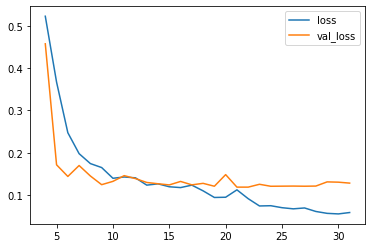

In [13]:
# full_ev = EvaluateModel(full_model)
losses = pd.DataFrame(full_model.history.history)
losses = losses.iloc[4:,:]
losses.plot()

In [14]:
# full_ev.plot_losses()
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = full_model.predict(X_test)
mean_absolute_error(y_test,predictions)

2/2 [==============================] - 0s 32ms/step


2022-07-24 19:36:58.684126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.3872095031498617

In [15]:
# full_ev.get_regression()
np.sqrt(mean_squared_error(y_test,predictions))

0.5187848770407008

In [16]:
np.sqrt(mean_squared_error(y_test,predictions)) / y_tot.mean()

0.2846960088361435

In [17]:
# full_ev.get_exp_var()
explained_variance_score(y_test,predictions)

0.20027677673380329

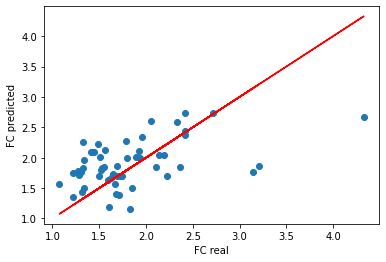

In [18]:
plt.scatter(y_test,predictions)
plt.xlabel("FC real")
plt.ylabel("FC predicted")
plt.plot(y_test,y_test,'r')

# Reduced matrix with significant genes

In [19]:
X = df_x.iloc[:,13:].values
y = df_y.values

In [20]:
print(f'X matrix has dims {X.shape} and y matrix has dims {y.shape}')

X matrix has dims (268, 162) and y matrix has dims (268, 1)


In [21]:
# small_data = PrepareData(X,y,0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42, 
                                                    stratify = df_x[['Broadphenotype',
                                                                     'FC_class']])

## Build the model

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

small_model = Sequential()

small_model.add(Dense(units=162,activation='relu'))
small_model.add(Dropout(0.2))
# small_model.add(Dense(units=81,activation='relu'))
# small_model.add(Dropout(0.1))
# small_model.add(Dense(units=40,activation='relu'))
# small_model.add(Dropout(0))
# small_model.add(Dense(units=20,activation='relu'))
# small_model.add(Dropout(0))
# small_model.add(Dense(units=10,activation='relu'))
# small_model.add(Dropout(0))
# small_model.add(Dense(units=5,activation='relu'))
# small_model.add(Dropout(0))
small_model.add(Dense(1))

small_model.compile(loss='huber_loss', 
                    optimizer='adam')

In [23]:
small_model.fit(x=X_train, 
          y=y_train, 
          epochs=800,
          callbacks=[early_stop],
          validation_data=(X_test, y_test),
          verbose=1
          )

Epoch 1/800


2022-07-24 19:38:32.487165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 27ms/step - loss: 0.5084 - val_loss: 0.2298
Epoch 2/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2987 - val_loss: 0.2356
Epoch 3/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2358 - val_loss: 0.1696
Epoch 4/800
1/7 [===>..........................] - ETA: 0s - loss: 0.1701

2022-07-24 19:38:32.908203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 9ms/step - loss: 0.2041 - val_loss: 0.1700
Epoch 5/800
7/7 [==============================] - 0s 9ms/step - loss: 0.1642 - val_loss: 0.1294
Epoch 6/800
7/7 [==============================] - 0s 8ms/step - loss: 0.1619 - val_loss: 0.1330
Epoch 7/800
7/7 [==============================] - 0s 9ms/step - loss: 0.1314 - val_loss: 0.1320
Epoch 8/800
7/7 [==============================] - 0s 8ms/step - loss: 0.1362 - val_loss: 0.1087
Epoch 9/800
7/7 [==============================] - 0s 8ms/step - loss: 0.1196 - val_loss: 0.1002
Epoch 10/800
7/7 [==============================] - 0s 8ms/step - loss: 0.1203 - val_loss: 0.1014
Epoch 11/800
7/7 [==============================] - 0s 8ms/step - loss: 0.1190 - val_loss: 0.1028
Epoch 12/800
7/7 [==============================] - 0s 8ms/step - loss: 0.1120 - val_loss: 0.1047
Epoch 13/800
7/7 [==============================] - 0s 8ms/step - loss: 0.1082 - val_loss: 0.1039
Epoch 14/800
7/7 [====================

<AxesSubplot:>

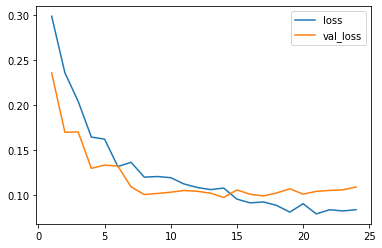

In [24]:
# small_ev = EvaluateModel(small_model)

# full_ev = EvaluateModel(full_model)
losses = pd.DataFrame(small_model.history.history)
losses = losses.iloc[1:,:]
losses.plot()

In [25]:
# small_ev.plot_losses()

predictions = small_model.predict(X_test)
mean_absolute_error(y_test,predictions)

2/2 [==============================] - 0s 13ms/step


2022-07-24 19:38:49.706978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.34435213079963767

In [26]:
# small_ev.get_exp_var()
np.sqrt(mean_squared_error(y_test,predictions))

0.4704419230812617

In [27]:
np.sqrt(mean_squared_error(y_test,predictions)) / y.mean()

0.2581666193787828

In [28]:
explained_variance_score(y_test,predictions)

0.4213393481253831

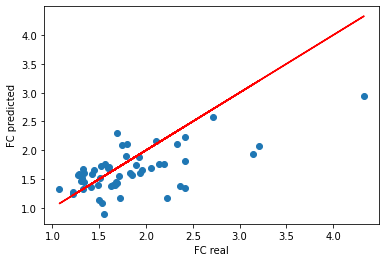

In [29]:
plt.scatter(y_test,predictions)
plt.xlabel("FC real")
plt.ylabel("FC predicted")
plt.plot(y_test,y_test,'r')

# New models

From this part, I'm training the ANNs with the full data. We are going from using 268 genomes to use 531, so more than twice the datapoints should also be good for our predictive power. 

## Read the data

In [2]:
# load total data

root_data = '/Users/danmarti/Documents/MRC_postdoc/Pangenomic/pangenome_analysis/ALL/phylo_analysis/PG_ANNs/output/tables/'

# df_tot = pd.read_excel(root_data + 'worm_FC_PA_all.xlsx')
with open(root_data + 'worm_FC_PA_all.xlsx', mode="rb") as excel_file:
    df_tot = pd.read_excel(excel_file)

# load partial data with selection of few genes
with open(root_data + 'worm_FC_PA_sig.xlsx', mode="rb") as excel_file:
    df_sig = pd.read_excel(excel_file)


In [3]:
values = {'Broadphenotype':'Unknown'}
df_tot.fillna(value=values, inplace=True)
df_sig.fillna(value=values, inplace=True)

In [4]:
print(f'Total data has dims {df_tot.shape} and partial data has dims {df_sig.shape}')

Total data has dims (522, 7963) and partial data has dims (522, 614)


### Working with full pyseer model

In [5]:
df_tot.iloc[:,22:].columns

Index(['zntB', 'melA', 'bcsZ', 'dgcM_2~~~dgcM~~~dgcM_1',
       'bcsC_2~~~bcsC_1~~~lapB_1~~~bcsC~~~bepA_1~~~bcsC_3',
       'ybdM~~~ybdM_2~~~ybdM_3~~~ybdM_1', 'smrA~~~smrA_1~~~smrA_2',
       'appA_1~~~appA~~~appA_2', 'group_7519', 'entS_1~~~entS',
       ...
       'group_2223', 'group_2175', 'group_2174', 'group_2121', 'virB4_1',
       'group_818', 'group_661', 'group_590', 'group_216', 'group_158'],
      dtype='object', length=7941)

In [35]:
# generate the X train and test sets
X_tot = df_tot.iloc[:,22:].values
y_tot = df_tot['FC_worm'].values

In [36]:
print(f'X matrix has dims {X_tot.shape} and y matrix has dims {y_tot.shape}')

X matrix has dims (522, 7941) and y matrix has dims (522,)


In [37]:
df_tot.columns[1:30]

Index(['genome', 'FC_class', 'ID', 'Strainname', 'Accession', 'Assembly',
       'Annotation', 'Broadphenotype', 'phylogroup', 'Well', 'PG',
       'Plate_Well', 'Plate', 'Origin', 'Annotation_0mM', 'Annotation_50mM',
       'phylogroup_Ctyping', 'mash_group_Ctyping', 'Discard', 'Notes',
       'FC_worm', 'zntB', 'melA', 'bcsZ', 'dgcM_2~~~dgcM~~~dgcM_1',
       'bcsC_2~~~bcsC_1~~~lapB_1~~~bcsC~~~bepA_1~~~bcsC_3',
       'ybdM~~~ybdM_2~~~ybdM_3~~~ybdM_1', 'smrA~~~smrA_1~~~smrA_2',
       'appA_1~~~appA~~~appA_2'],
      dtype='object')

In [38]:
df_tot['Broadphenotype'].value_counts()

Commensal strain     372
Pathogenic strain    111
Unknown               23
Laboratory strain     16
Name: Broadphenotype, dtype: int64

In [46]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tot,y_tot,test_size=0.2,
                                                    random_state=42, 
                                                    stratify = df_tot[['Broadphenotype', 'FC_class']])

print(f'The shape of the X train is {X_train.shape} and the shape of the y train is {y_train.shape}')
print(f'The shape of the X test is {X_test.shape} and the shape of the y test is {y_test.shape}')

The shape of the X train is (417, 7941) and the shape of the y train is (417,)
The shape of the X test is (105, 7941) and the shape of the y test is (105,)


### Build the model

In [47]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
units = X_train.shape[1]

full_model = Sequential()

full_model.add(Dense(units=units, activation='relu'))
full_model.add(Dropout(0.2))
full_model.add(Dense(units=3600,activation='relu'))
full_model.add(Dropout(0.2))
# full_model.add(Dense(units=1800,activation='relu'))
# full_model.add(Dropout(0.2))
# full_model.add(Dense(units=20,activation='relu'))
# full_model.add(Dropout(0.2))
# full_model.add(Dense(units=10,activation='relu'))
# full_model.add(Dropout(0))
# full_model.add(Dense(units=5,activation='relu'))
# full_model.add(Dropout(0))
full_model.add(Dense(1))
# loss='mse'
full_model.compile(loss='huber_loss', optimizer='adam')

### Fit the model

In [48]:
full_model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          callbacks=[early_stop],
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/150
 1/14 [=>............................] - ETA: 4s - loss: 1.0331

2022-07-25 12:54:14.177525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 36ms/step - loss: 17.1862 - val_loss: 0.1307
Epoch 2/150
 4/14 [=======>......................] - ETA: 0s - loss: 0.2249

2022-07-25 12:54:14.748053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 25ms/step - loss: 0.2139 - val_loss: 0.1680
Epoch 3/150
14/14 [==============================] - 0s 25ms/step - loss: 0.1598 - val_loss: 0.0963
Epoch 4/150
14/14 [==============================] - 0s 26ms/step - loss: 0.1132 - val_loss: 0.1131
Epoch 5/150
14/14 [==============================] - 0s 25ms/step - loss: 0.1030 - val_loss: 0.1143
Epoch 6/150
14/14 [==============================] - 0s 24ms/step - loss: 0.0843 - val_loss: 0.1688
Epoch 7/150
14/14 [==============================] - 0s 24ms/step - loss: 0.1126 - val_loss: 0.0890
Epoch 8/150
14/14 [==============================] - 0s 26ms/step - loss: 0.0616 - val_loss: 0.0894
Epoch 9/150
14/14 [==============================] - 0s 24ms/step - loss: 0.0445 - val_loss: 0.0950
Epoch 10/150
14/14 [==============================] - 0s 25ms/step - loss: 0.0363 - val_loss: 0.0989
Epoch 11/150
14/14 [==============================] - 0s 24ms/step - loss: 0.0330 - val_loss: 0.0963
Epoch 12/1

#### Model performance

In [49]:
# build and print the model summary
full_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 7941)              63067422  
                                                                 
 dropout_6 (Dropout)         (None, 7941)              0         
                                                                 
 dense_10 (Dense)            (None, 3600)              28591200  
                                                                 
 dropout_7 (Dropout)         (None, 3600)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 3601      
                                                                 
Total params: 91,662,223
Trainable params: 91,662,223
Non-trainable params: 0
_________________________________________________________________


In [62]:
# draw the model architecture from tensorflow.keras.models.model.summary()
from keras.utils.vis_utils import plot_model
import pydot
import graphviz
plot_model(full_model, to_file=root_data + 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [43]:
# full_ev.plot_losses()
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = full_model.predict(X_test)
mean_absolute_error(y_test,predictions)

4/4 [==============================] - 0s 18ms/step


2022-07-25 12:46:01.997602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.308605416962223

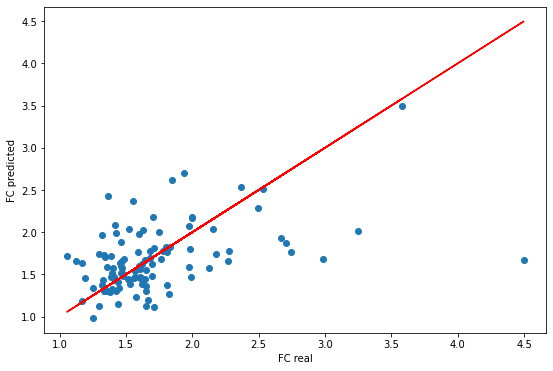

In [44]:
# generate a plot of the predicted vs real FC with plot size of 20x20
plt.figure(figsize=(9, 6))
plt.scatter(y_test,predictions)
plt.xlabel("FC real")
plt.ylabel("FC predicted")
plt.plot(y_test,y_test,'r')
plt.savefig(root_data +'full_model_pred.pdf')

In [45]:
# full_ev.get_exp_var()
explained_variance_score(y_test,predictions)

0.11898716314364333

## Working with sig genes

In [17]:
# generate the X train and test sets
X_sig = df_sig.iloc[:,22:].values
y_sig = df_sig['FC_worm'].values

In [18]:
print(f'X matrix has dims {X_sig.shape} and y matrix has dims {y_sig.shape}')

X matrix has dims (522, 592) and y matrix has dims (522,)


### Split the data

In [19]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y_sig,test_size=0.2,
                                                    random_state=42, 
                                                    stratify = df_sig[['Broadphenotype', 'FC_class']])

print(f'The shape of the X train is {X_train.shape} and the shape of the y train is {y_train.shape}')
print(f'The shape of the X test is {X_test.shape} and the shape of the y test is {y_test.shape}')

The shape of the X train is (417, 592) and the shape of the y train is (417,)
The shape of the X test is (105, 592) and the shape of the y test is (105,)


### Build the model

In [20]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
units = X_train.shape[1]

full_model = Sequential()

full_model.add(Dense(units=units, activation='relu'))
full_model.add(Dropout(0.2))
full_model.add(Dense(units=250, activation='relu'))
full_model.add(Dropout(0.2))
# full_model.add(Dense(units=150,activation='relu'))
# full_model.add(Dropout(0.2))
# full_model.add(Dense(units=70,activation='relu'))
# full_model.add(Dropout(0.2))
# full_model.add(Dense(units=10,activation='relu'))
# full_model.add(Dropout(0))
# full_model.add(Dense(units=5,activation='relu'))
# full_model.add(Dropout(0))
full_model.add(Dense(1))
# loss='mse'
full_model.compile(loss='huber_loss', optimizer='adam')

### Fit the model

In [21]:
full_model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          callbacks=[early_stop],
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/150
 1/14 [=>............................] - ETA: 4s - loss: 1.4691

2022-07-25 12:38:16.837071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 20ms/step - loss: 0.3258 - val_loss: 0.1769
Epoch 2/150
14/14 [==============================] - 0s 9ms/step - loss: 0.1491 - val_loss: 0.0973
Epoch 3/150
 1/14 [=>............................] - ETA: 0s - loss: 0.0954

2022-07-25 12:38:17.188051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 10ms/step - loss: 0.1366 - val_loss: 0.1026
Epoch 4/150
14/14 [==============================] - 0s 8ms/step - loss: 0.1180 - val_loss: 0.1346
Epoch 5/150
14/14 [==============================] - 0s 9ms/step - loss: 0.1137 - val_loss: 0.1230
Epoch 6/150
14/14 [==============================] - 0s 8ms/step - loss: 0.1063 - val_loss: 0.1021
Epoch 7/150
14/14 [==============================] - 0s 9ms/step - loss: 0.0936 - val_loss: 0.1025
Epoch 8/150
14/14 [==============================] - 0s 10ms/step - loss: 0.1113 - val_loss: 0.0955
Epoch 9/150
14/14 [==============================] - 0s 9ms/step - loss: 0.0928 - val_loss: 0.0953
Epoch 10/150
14/14 [==============================] - 0s 9ms/step - loss: 0.1221 - val_loss: 0.1150
Epoch 11/150
14/14 [==============================] - 0s 9ms/step - loss: 0.1369 - val_loss: 0.1432
Epoch 12/150
14/14 [==============================] - 0s 9ms/step - loss: 0.0887 - val_loss: 0.1025
Epoch 13/150
14/1

In [22]:
# build and print the model summary
full_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 592)               351056    
                                                                 
 dropout_2 (Dropout)         (None, 592)               0         
                                                                 
 dense_4 (Dense)             (None, 250)               148250    
                                                                 
 dropout_3 (Dropout)         (None, 250)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                                 
Total params: 499,557
Trainable params: 499,557
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

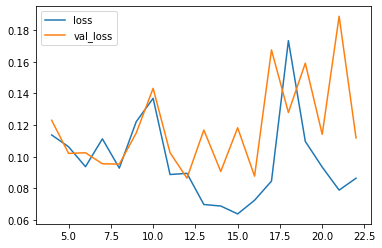

In [23]:
# full_ev = EvaluateModel(full_model)
losses = pd.DataFrame(full_model.history.history)
losses = losses.iloc[4:,:]
losses.plot()

In [24]:
# full_ev.plot_losses()
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = full_model.predict(X_test)
mean_absolute_error(y_test,predictions)

4/4 [==============================] - 0s 7ms/step


2022-07-25 12:38:25.572332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.36568944503854217

In [25]:
# full_ev.get_exp_var()
explained_variance_score(y_test,predictions)

0.26169581988143564

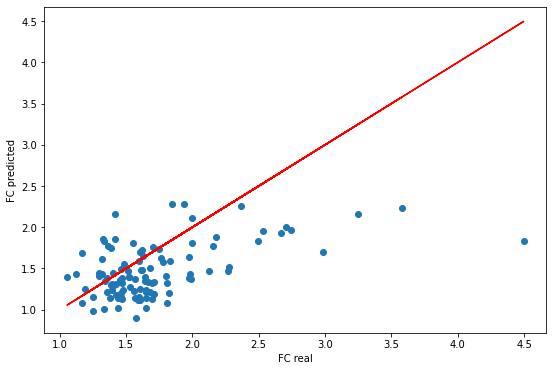

In [34]:
# generate a plot of the predicted vs real FC with plot size of 20x20
plt.figure(figsize=(9, 6))
plt.scatter(y_test,predictions)
plt.xlabel("FC real")
plt.ylabel("FC predicted")
plt.plot(y_test,y_test,'r')
plt.savefig(root_data +'small_model_pred.pdf')

# Train several models to see performance

In [108]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_tot,y_tot,test_size=0.2,
                                                    random_state=42, 
                                                    stratify = df_tot[['Broadphenotype', 'FC_class']])

print(f'The shape of the X train is {X_train.shape} and the shape of the y train is {y_train.shape}')
print(f'The shape of the X test is {X_test.shape} and the shape of the y test is {y_test.shape}')

The shape of the X train is (417, 7941) and the shape of the y train is (417,)
The shape of the X test is (105, 7941) and the shape of the y test is (105,)


In [109]:
# create a function that loops a specific number of times and returns the explained variance score  of the model
def large_model(model,X_train,y_train,X_test,y_test,epochs=150,batch_size=32, iters=10):
      exp_var = []
      for iteration in range(iters):
            print(f'Fitting model number {iteration}\n\n\n')
            
            data_save = '/Users/danmarti/Documents/MRC_postdoc/Pangenomic/pangenome_analysis/ALL/phylo_analysis/PG_ANNs/output/predictions_tf2/'
            # create the model
            early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

            model = Sequential()
            model.add(Dense(units=X_train.shape[1], activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(units=3600, activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(1))
            model.compile(loss='huber_loss', optimizer='adam')

            # fit the model
            model.fit(x=X_train, 
                  y=y_train, 
                  epochs=epochs,
                  callbacks=[early_stop],
                  batch_size=batch_size,
                  validation_data=(X_test, y_test), verbose=0
                  )
            predictions = model.predict(X_test)
            temp_var = explained_variance_score(y_test,predictions)
            exp_var.append(temp_var)

            # plot the predictions vs real FC
            plt.figure(figsize=(9, 6))
            plt.scatter(y_test,predictions)
            plt.xlabel("FC real")
            plt.ylabel("FC predicted")
            plt.plot(y_test,y_test,'r')
            plt.savefig(data_save +'large_model_pred'+ str(iteration) +'.pdf')

      return exp_var


Fitting model number 0





2022-07-25 14:45:30.483613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:45:31.187213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 16: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 1





2022-07-25 14:45:36.685561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:45:36.996041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:45:37.677469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 43: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 2





2022-07-25 14:45:51.597836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:45:51.929018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:45:52.604706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 30: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 3





2022-07-25 14:46:02.364297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:02.686510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:03.385558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 4





2022-07-25 14:46:09.449892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:10.061223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:10.737537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 15: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 5





2022-07-25 14:46:15.374108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:15.692313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:16.345981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 17: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 6





2022-07-25 14:46:21.594854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:21.911280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:22.585242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 16: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 7





2022-07-25 14:46:27.529580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:27.842220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:28.496894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 23: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 8





2022-07-25 14:46:35.629944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:35.942508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:36.607021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 9





2022-07-25 14:46:42.450338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:42.882161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:43.716184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 13: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 10





2022-07-25 14:46:47.693039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:48.123877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:46:48.946881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 37: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 11





2022-07-25 14:47:00.401905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:00.838361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:01.499406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 17: early stopping
4/4 [==============================] - 0s 13ms/step


2022-07-25 14:47:07.143525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Fitting model number 12





2022-07-25 14:47:07.479713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:08.159668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 16: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 13





2022-07-25 14:47:13.112432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:13.428968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:14.074874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 40: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 14





2022-07-25 14:47:26.490854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:26.805385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:27.438784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 16: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 15





2022-07-25 14:47:32.398177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:32.718293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:33.350845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 25: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 16





2022-07-25 14:47:41.207563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:41.548236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:42.291972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 21: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 17





2022-07-25 14:47:48.973036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:49.285940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:47:50.071073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 48: early stopping
4/4 [==============================] - 0s 14ms/step
Fitting model number 18





2022-07-25 14:48:05.042742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:05.369221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:06.029457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 17: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 19





2022-07-25 14:48:11.355925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:11.784423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:12.687644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 27: early stopping
4/4 [==============================] - 0s 14ms/step


2022-07-25 14:48:21.190184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Fitting model number 20





2022-07-25 14:48:21.999749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:22.920563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 17: early stopping
4/4 [==============================] - 0s 13ms/step
Fitting model number 21





2022-07-25 14:48:28.355574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/xy/wf6xxhnx3hx557yklnkjk7zr0000gn/T/ipykernel_35478/2106621330.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9, 6))
2022-07-25 14:48:28.696524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:29.429161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 32: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 22





2022-07-25 14:48:39.561108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:39.900927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:40.538503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 23





2022-07-25 14:48:46.556930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:46.867626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:47.601105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 14: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 24





2022-07-25 14:48:51.998123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:52.338864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:48:53.162432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 29: early stopping
4/4 [==============================] - 0s 11ms/step
Fitting model number 25





2022-07-25 14:49:02.471006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:02.886648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:03.791588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 14: early stopping
4/4 [==============================] - 0s 15ms/step


2022-07-25 14:49:08.469617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Fitting model number 26





2022-07-25 14:49:08.956345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:09.630674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 12: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 27





2022-07-25 14:49:13.570226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:13.879843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:14.657864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 15: early stopping
4/4 [==============================] - 0s 14ms/step
Fitting model number 28





2022-07-25 14:49:19.922368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:21.278615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:22.182493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 20: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 29





2022-07-25 14:49:29.554076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:29.895028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:30.733152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 20: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 30





2022-07-25 14:49:38.430123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:38.766086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:39.467901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 31: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 31





2022-07-25 14:49:51.066112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:51.516453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:52.423368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 17: early stopping
4/4 [==============================] - 0s 16ms/step
Fitting model number 32





2022-07-25 14:49:59.100787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:49:59.450281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:00.161825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 15: early stopping
4/4 [==============================] - 0s 15ms/step
Fitting model number 33





2022-07-25 14:50:05.736061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:06.198153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:07.052708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 21: early stopping
4/4 [==============================] - 0s 11ms/step
Fitting model number 34





2022-07-25 14:50:15.000020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:15.331337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:16.075598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 20: early stopping
4/4 [==============================] - 0s 15ms/step
Fitting model number 35





2022-07-25 14:50:23.726104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:24.071187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:24.924367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 18: early stopping
4/4 [==============================] - 0s 16ms/step
Fitting model number 36





2022-07-25 14:50:31.528734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:31.874461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:33.391119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 38: early stopping
4/4 [==============================] - 0s 14ms/step


2022-07-25 14:50:47.098835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Fitting model number 37





2022-07-25 14:50:47.565060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:48.258433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 13: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 38





2022-07-25 14:50:52.493507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:52.842723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:53.565499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 14: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 39





2022-07-25 14:50:58.021620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:58.343009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:50:59.033541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 22: early stopping
4/4 [==============================] - 0s 14ms/step


2022-07-25 14:51:06.182796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


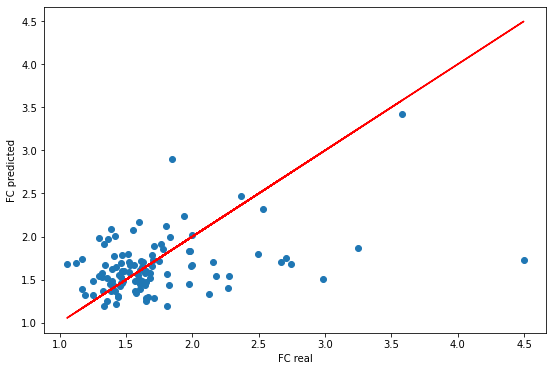

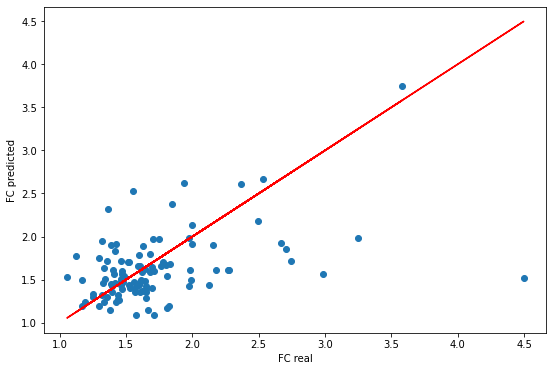

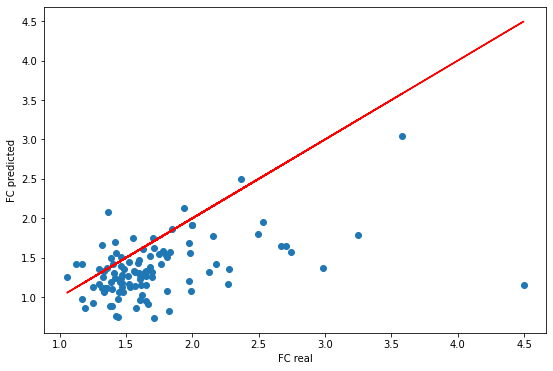

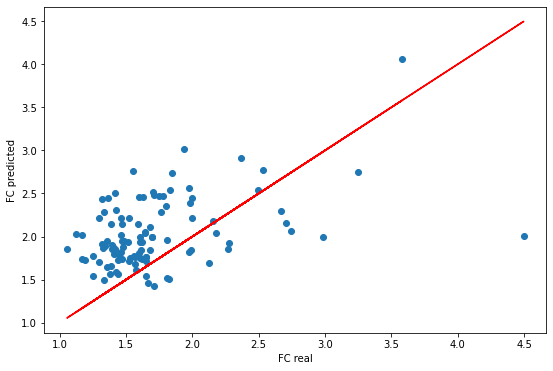

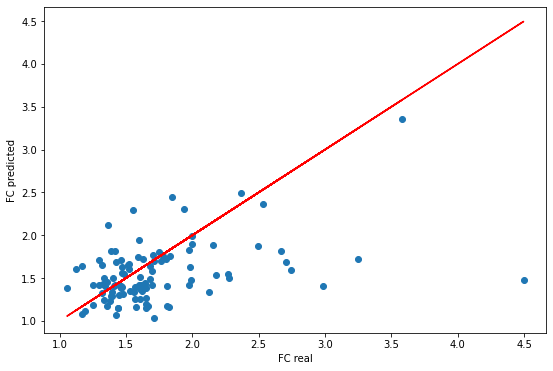

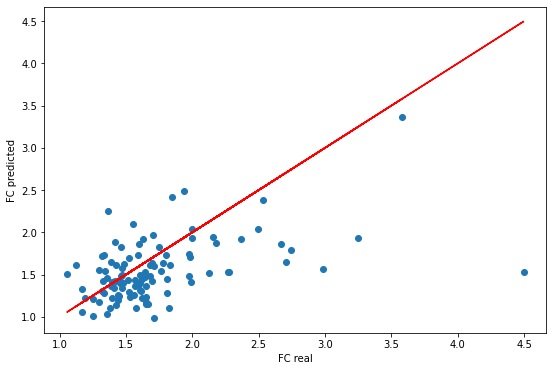

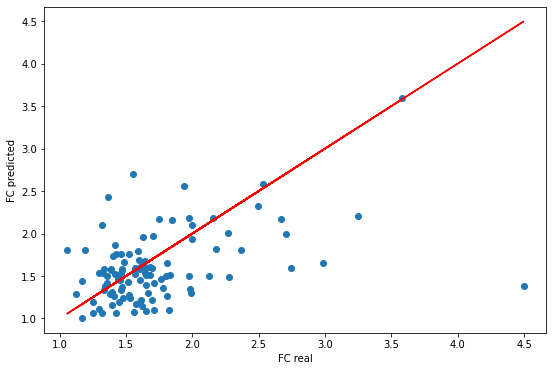

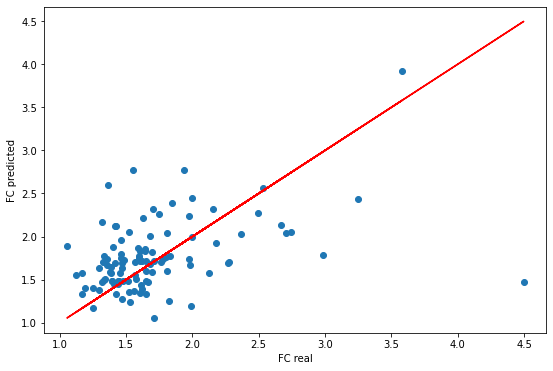

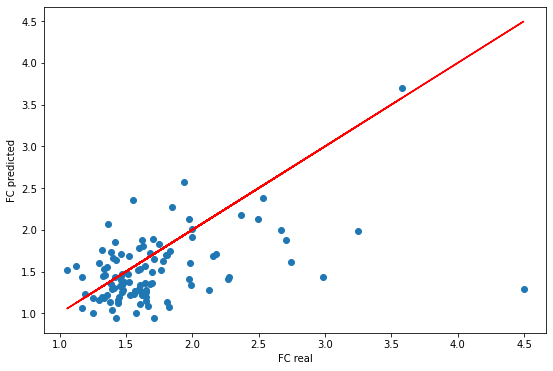

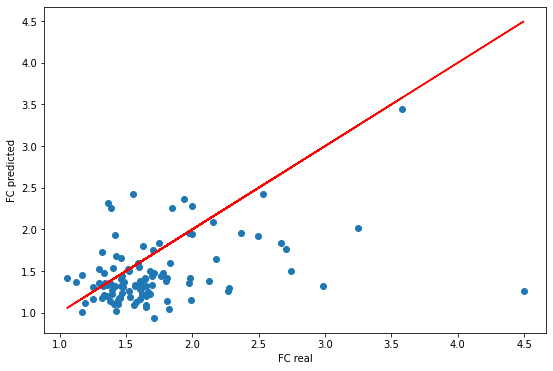

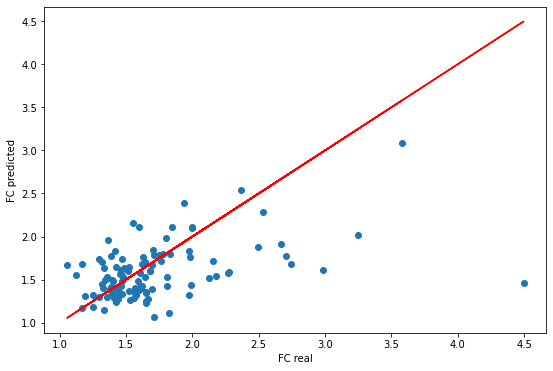

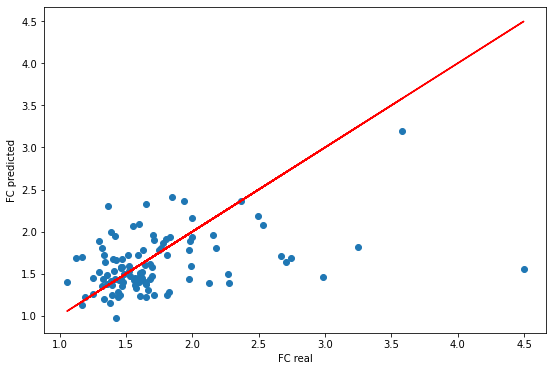

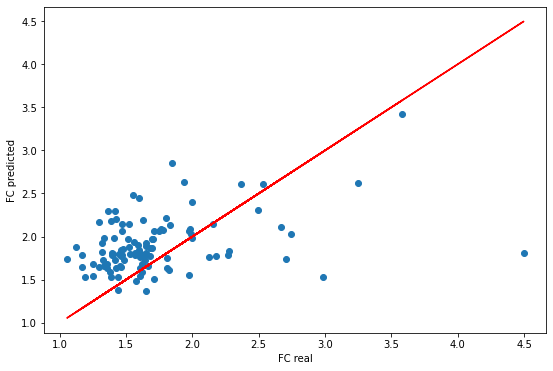

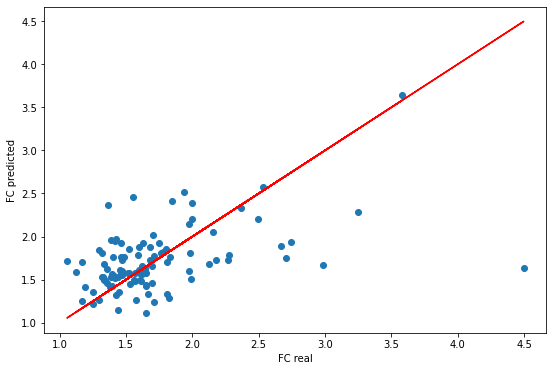

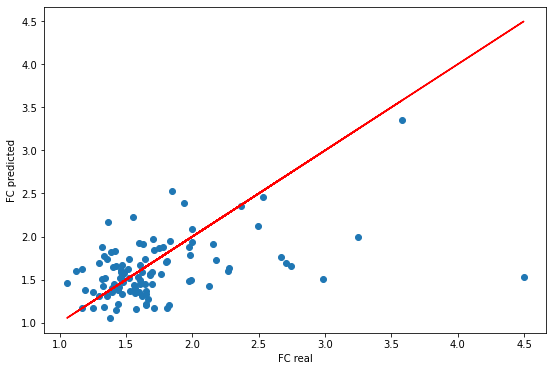

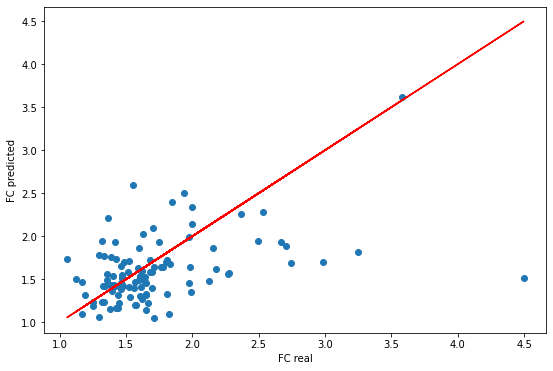

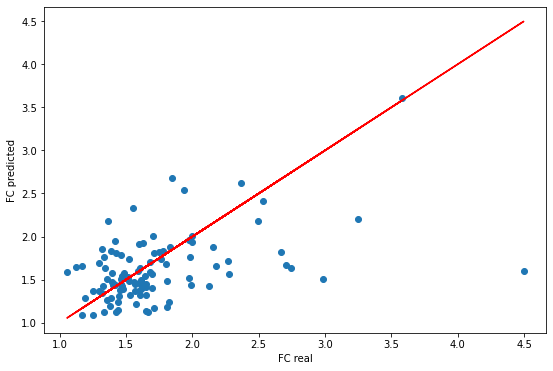

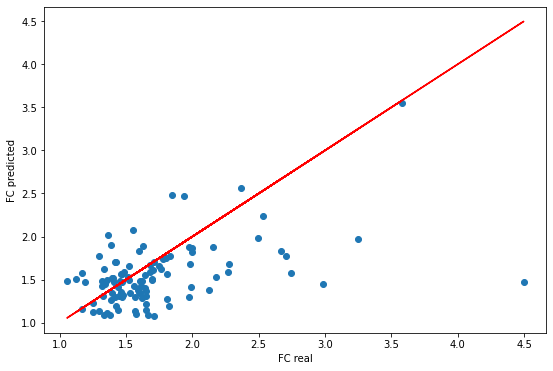

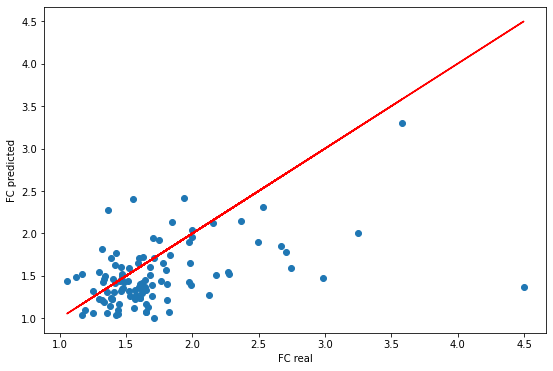

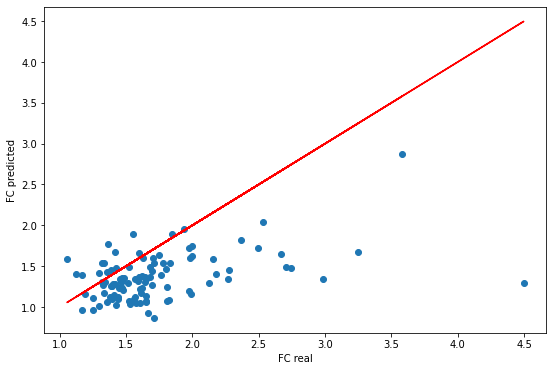

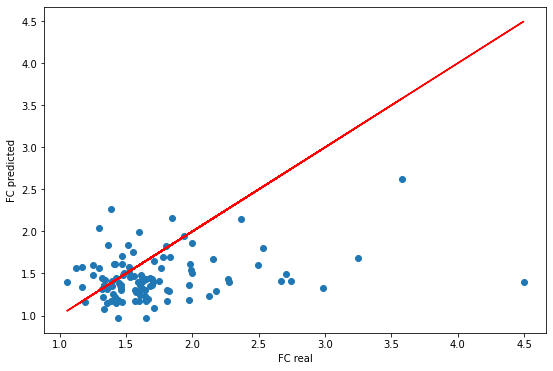

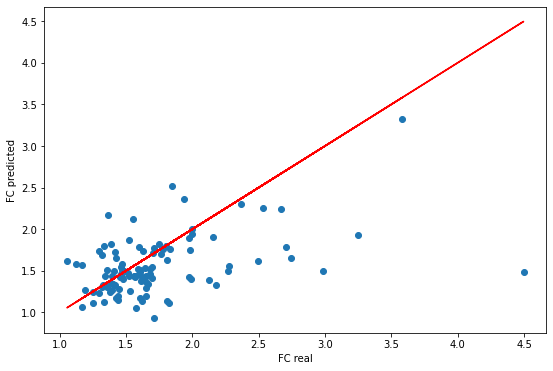

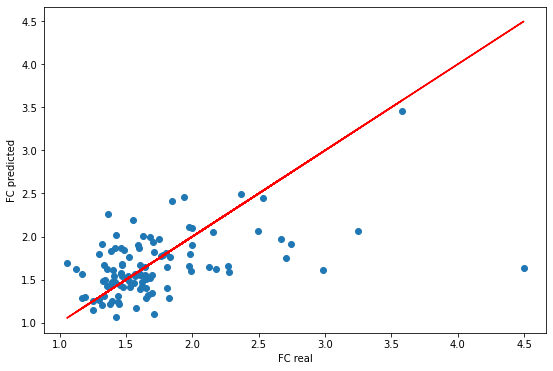

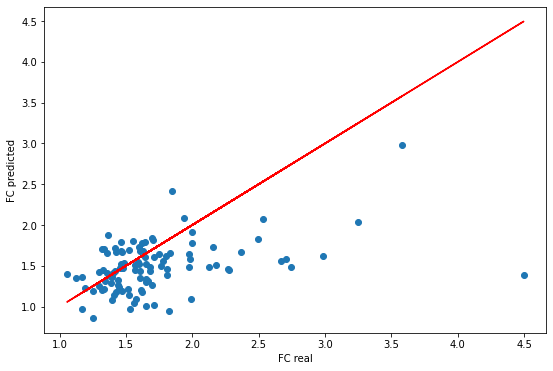

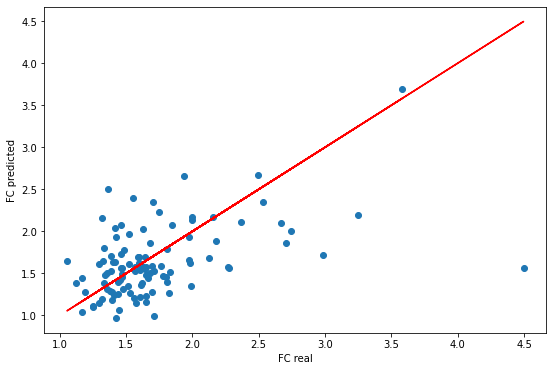

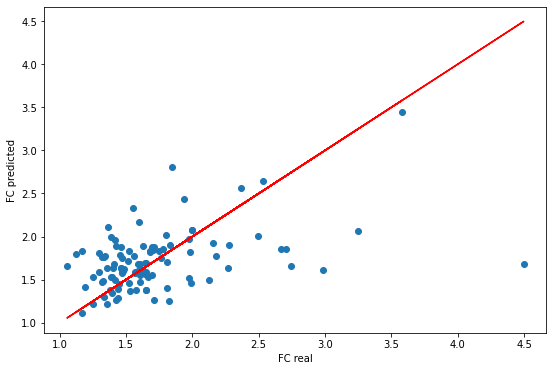

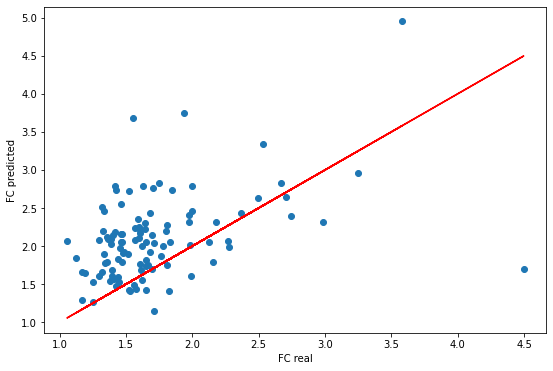

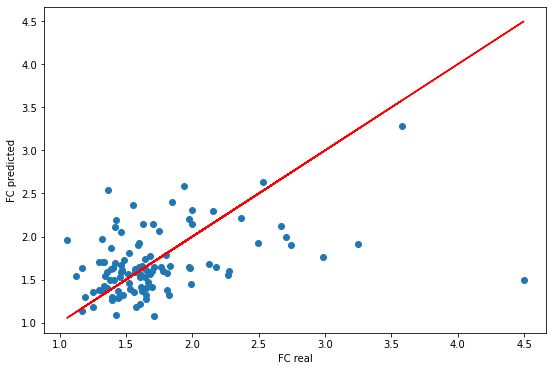

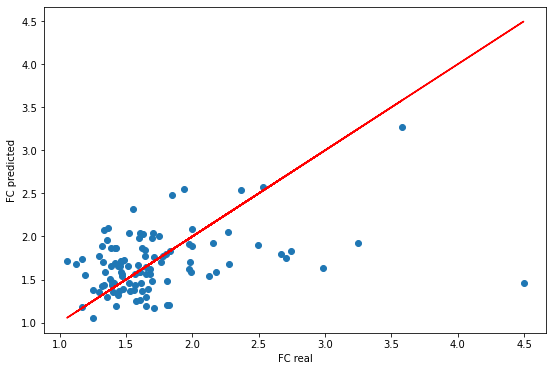

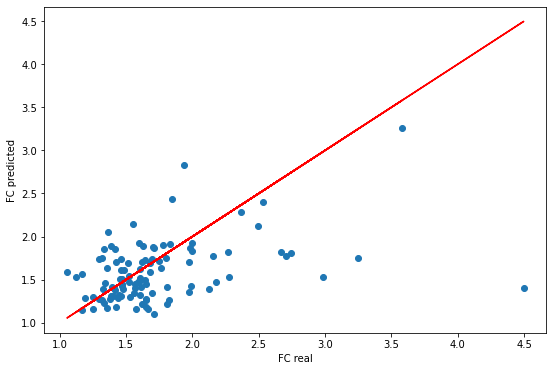

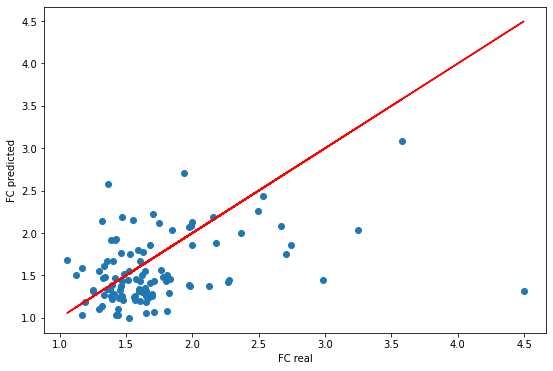

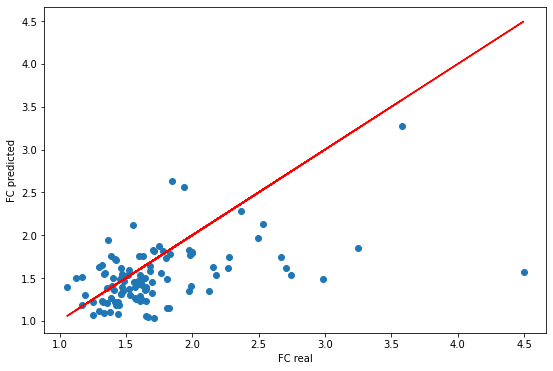

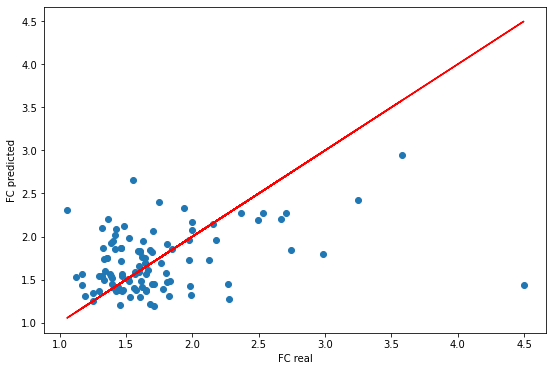

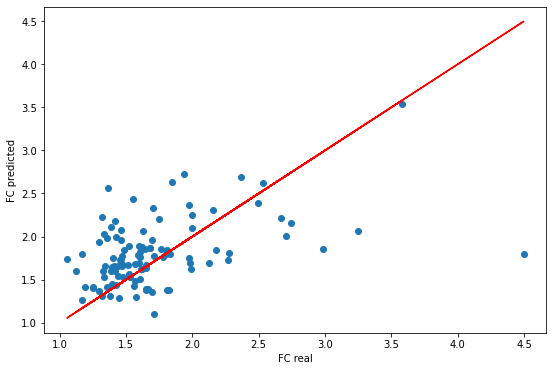

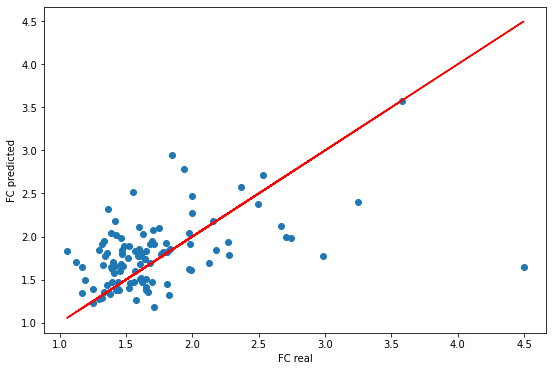

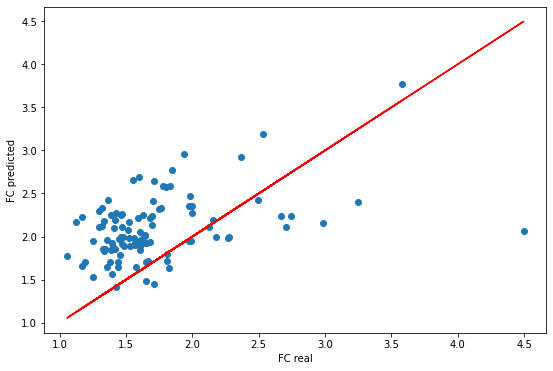

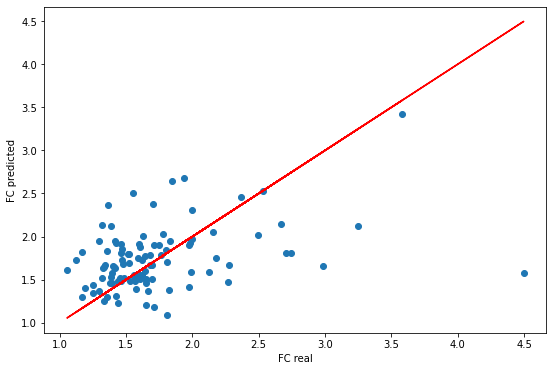

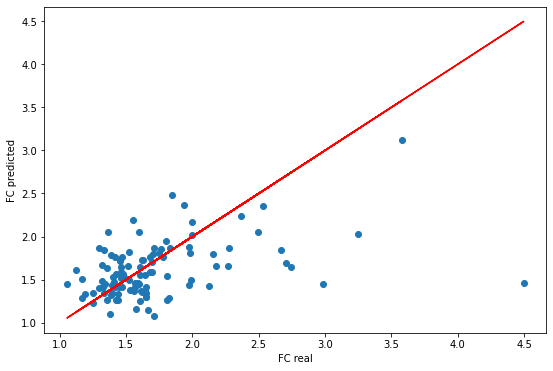

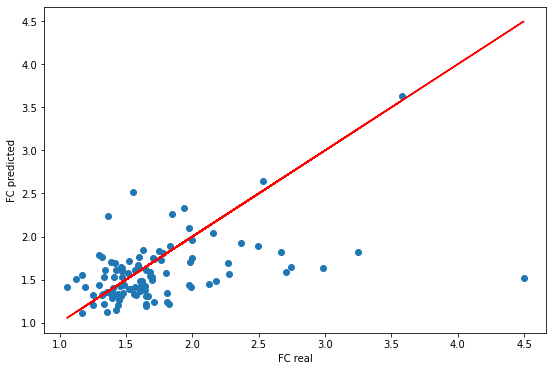

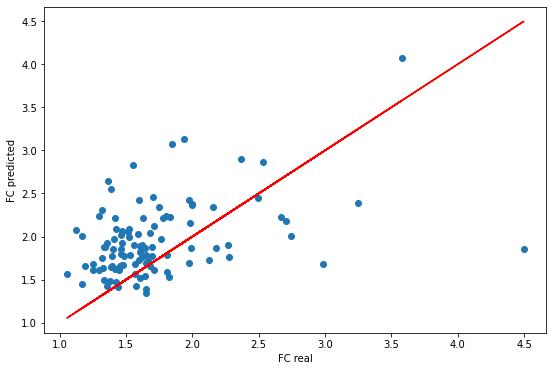

In [110]:
large_model_vars = large_model(full_model,X_train,y_train,X_test,y_test,epochs=150,batch_size=32, iters=40)

In [111]:
large_model_vars

[0.06933647904188112,
 0.1011468313727194,
 0.13556182925034976,
 0.07045633559249176,
 0.11101747856136823,
 0.18252748434866783,
 0.05601285627505004,
 0.0414833623705001,
 0.08836291306027622,
 0.03371902049226283,
 0.17268857543684613,
 0.07156202341847462,
 0.09595470289965391,
 0.1748979729260587,
 0.13736373988543582,
 0.09937156588760254,
 0.135343458918328,
 0.16956964717941325,
 0.14070407762572723,
 0.18346645452231047,
 -0.006960513943482072,
 0.14068574753173568,
 0.1851988189044519,
 0.14058567845683534,
 0.11276706678289761,
 0.13079143278589755,
 -0.256922493462886,
 0.04222679235547988,
 0.03546747817811735,
 0.096475248645573,
 -0.022052268759649385,
 0.17428742301669642,
 0.019601805825343543,
 0.12154082035449709,
 0.12401419222858345,
 0.09669880625139671,
 0.040771279605209654,
 0.14178034814259333,
 0.15708337322703492,
 -0.014864198265734263]

## Small model

In [112]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sig,y_sig,test_size=0.2,
                                                    random_state=42, 
                                                    stratify = df_sig[['Broadphenotype', 'FC_class']])


print(f'The shape of the X train is {X_train.shape} and the shape of the y train is {y_train.shape}')
print(f'The shape of the X test is {X_test.shape} and the shape of the y test is {y_test.shape}')

The shape of the X train is (417, 592) and the shape of the y train is (417,)
The shape of the X test is (105, 592) and the shape of the y test is (105,)


In [113]:
# create a function that loops a specific number of times and returns the explained variance score  of the model
def small_model(model,X_train,y_train,X_test,y_test,epochs=150,batch_size=32, iters=40):
      exp_var = []
      for iteration in range(iters):
            print(f'Fitting model number {iteration}\n\n\n')
            
            data_save = '/Users/danmarti/Documents/MRC_postdoc/Pangenomic/pangenome_analysis/ALL/phylo_analysis/PG_ANNs/output/predictions_tf2/'
            # create the model
            early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

            model = Sequential()
            model.add(Dense(units=X_train.shape[1], activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(units=250, activation='relu'))
            model.add(Dropout(0.2))
            model.add(Dense(1))
            model.compile(loss='huber_loss', optimizer='adam')

            # fit the model
            model.fit(x=X_train, 
                  y=y_train, 
                  epochs=epochs,
                  callbacks=[early_stop],
                  batch_size=batch_size,
                  validation_data=(X_test, y_test), verbose=0
                  )
            predictions = model.predict(X_test)
            temp_var = explained_variance_score(y_test,predictions)
            exp_var.append(temp_var)

            # plot the predictions vs real FC
            plt.figure(figsize=(9, 6))
            plt.scatter(y_test,predictions)
            plt.xlabel("FC real")
            plt.ylabel("FC predicted")
            plt.plot(y_test,y_test,'r')
            plt.savefig(data_save +'small_model_pred'+ str(iteration) +'.pdf')

      return exp_var


Fitting model number 0





2022-07-25 14:51:26.902767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:27.544517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 24: early stopping
4/4 [==============================] - 0s 6ms/step
Fitting model number 1





2022-07-25 14:51:30.279037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:30.574267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:31.082653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 2





2022-07-25 14:51:33.168916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:33.480788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:34.120924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 28: early stopping
4/4 [==============================] - 0s 6ms/step
Fitting model number 3





2022-07-25 14:51:37.403071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:37.721126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:38.255773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 41: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 4





2022-07-25 14:51:42.561273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:42.877438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:43.486531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 28: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 5





2022-07-25 14:51:46.540979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:46.881690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:47.547798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 28: early stopping
4/4 [==============================] - 0s 11ms/step
Fitting model number 6





2022-07-25 14:51:50.527322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:50.842567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:51.527344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 7





2022-07-25 14:51:53.601268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:53.925318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:54.386958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 8





2022-07-25 14:51:56.450547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:57.223133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:51:57.815424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 26: early stopping
4/4 [==============================] - 0s 6ms/step
Fitting model number 9





2022-07-25 14:52:00.685995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:00.991081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:01.486683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 11ms/step
Fitting model number 10





2022-07-25 14:52:03.502349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:03.811004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:04.211957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 17: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 11





2022-07-25 14:52:06.071833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:06.389727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:06.926771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 23: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 12





2022-07-25 14:52:09.410034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:09.723876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:10.395171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 27: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 13





2022-07-25 14:52:13.207613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:13.524165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:14.194206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 25: early stopping
4/4 [==============================] - 0s 7ms/step
Fitting model number 14





2022-07-25 14:52:16.867978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:17.165093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:17.775581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 35: early stopping
4/4 [==============================] - 0s 7ms/step
Fitting model number 15





2022-07-25 14:52:21.418820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:21.719662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:22.312838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 23: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 16





2022-07-25 14:52:24.815008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:25.140292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:25.802798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 17





2022-07-25 14:52:27.881087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:28.192678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:28.848666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 18: early stopping
4/4 [==============================] - 0s 8ms/step


2022-07-25 14:52:30.804273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Fitting model number 18





2022-07-25 14:52:31.611972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:32.321382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 31: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 19





2022-07-25 14:52:35.717578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:36.031875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:36.710881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 32: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 20





2022-07-25 14:52:40.090584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:40.405638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:41.092675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 27: early stopping
4/4 [==============================] - 0s 7ms/step
Fitting model number 21





2022-07-25 14:52:43.985720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/xy/wf6xxhnx3hx557yklnkjk7zr0000gn/T/ipykernel_35478/1803083325.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9, 6))
2022-07-25 14:52:44.295146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:44.886550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 26: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 22





2022-07-25 14:52:47.694663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:48.018260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:48.601377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 32: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 23





2022-07-25 14:52:52.003149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:52.321633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:52.821660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 25: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 24





2022-07-25 14:52:55.467014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:55.781472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:56.445392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 25





2022-07-25 14:52:58.524299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:58.847558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:52:59.563782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 27: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 26





2022-07-25 14:53:02.452626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:02.767082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:03.383894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 25: early stopping
4/4 [==============================] - 0s 7ms/step
Fitting model number 27





2022-07-25 14:53:06.067069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:06.393252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:07.086023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 18: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 28





2022-07-25 14:53:09.126151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:10.026775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:10.710087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 32: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 29





2022-07-25 14:53:14.258616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:14.572294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:15.162464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 31: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 30





2022-07-25 14:53:18.456341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:18.771167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:19.480646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 31: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 31





2022-07-25 14:53:22.711217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:23.046281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:23.699385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 19: early stopping
4/4 [==============================] - 0s 8ms/step
Fitting model number 32





2022-07-25 14:53:25.765813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:26.078448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:26.763108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 34: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 33





2022-07-25 14:53:30.337236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:30.660927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:31.202220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 20: early stopping
4/4 [==============================] - 0s 7ms/step
Fitting model number 34





2022-07-25 14:53:33.382843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:33.692930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:34.384362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 31: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 35





2022-07-25 14:53:37.728136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:38.055721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:38.772173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 25: early stopping
4/4 [==============================] - 0s 12ms/step
Fitting model number 36





2022-07-25 14:53:41.567742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:41.882509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:42.514378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 21: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 37





2022-07-25 14:53:44.896295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:45.220704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:45.901896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 31: early stopping
4/4 [==============================] - 0s 9ms/step
Fitting model number 38





2022-07-25 14:53:49.655012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:50.578037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:51.318560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 15: early stopping
4/4 [==============================] - 0s 10ms/step
Fitting model number 39





2022-07-25 14:53:53.181267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:53.513103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-25 14:53:54.214081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 34: early stopping
4/4 [==============================] - 0s 8ms/step


2022-07-25 14:53:57.918710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


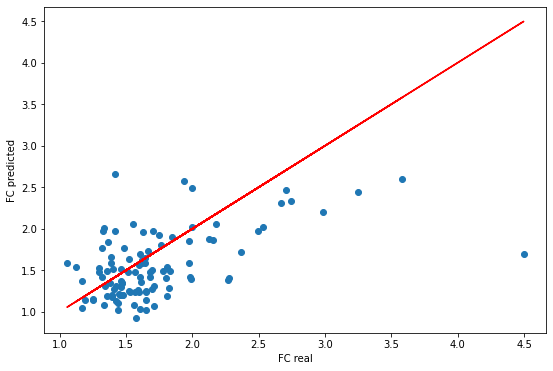

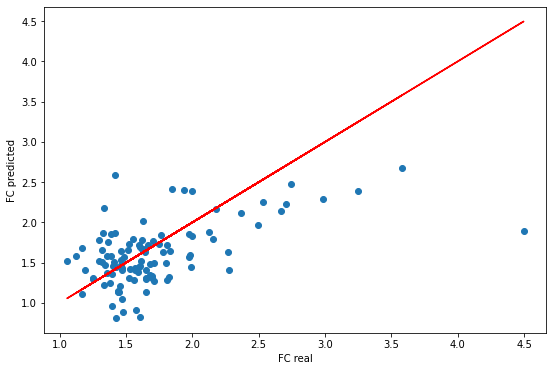

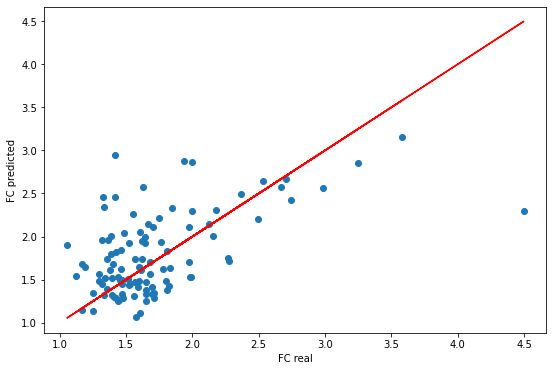

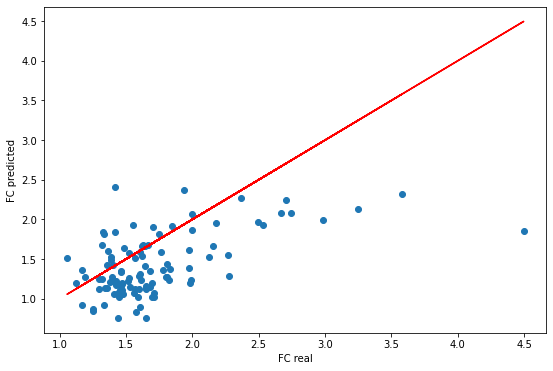

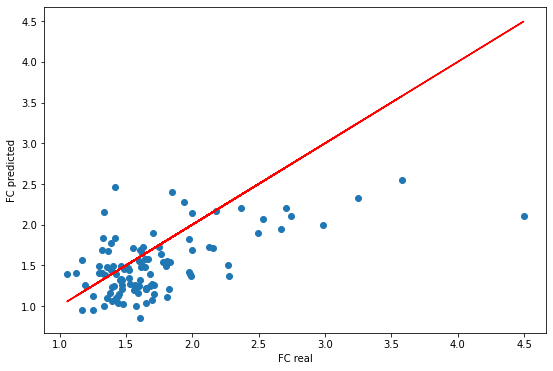

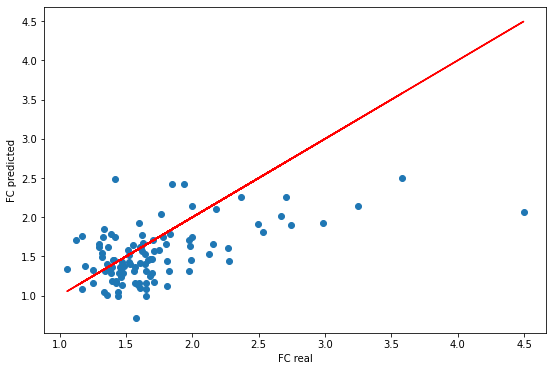

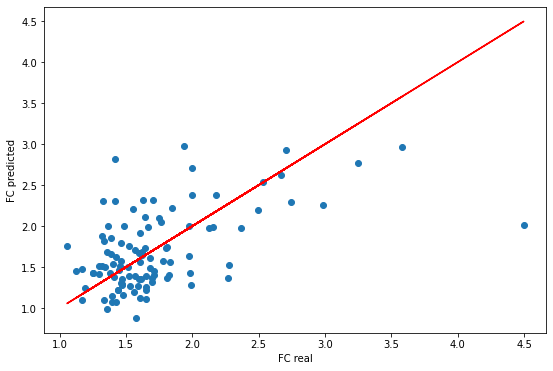

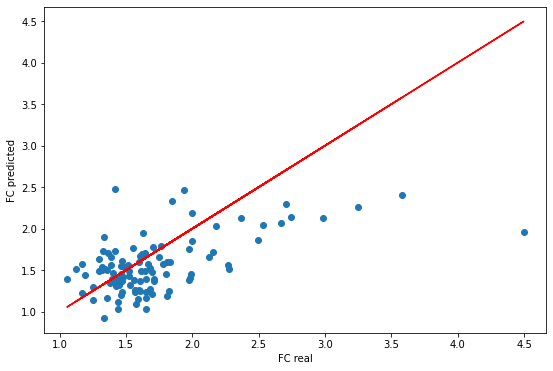

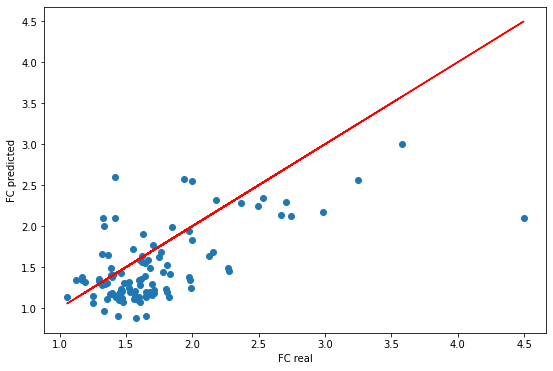

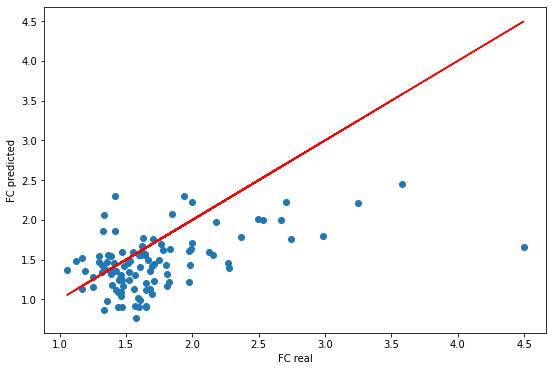

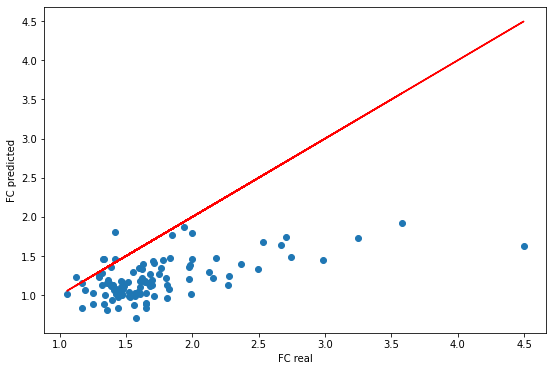

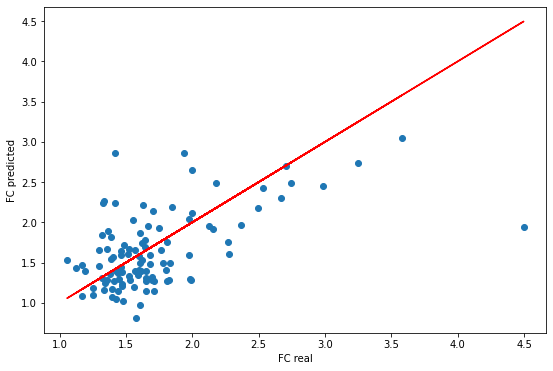

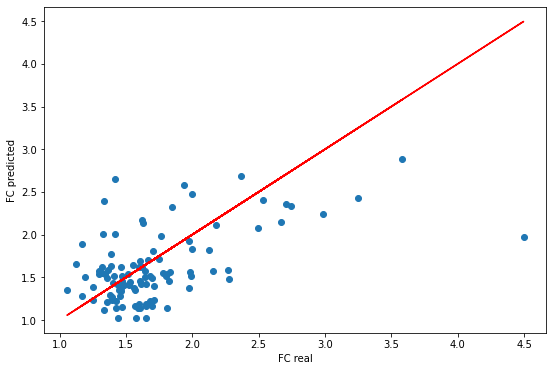

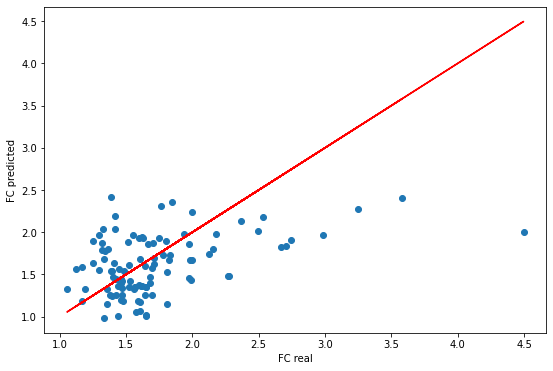

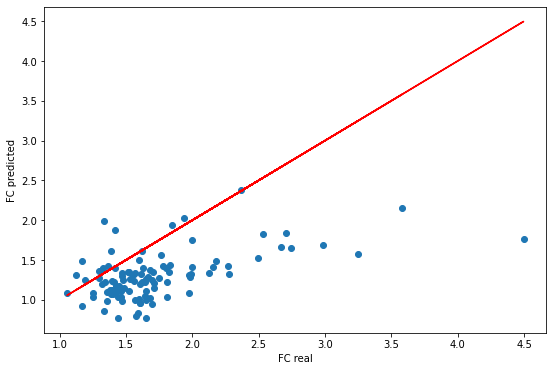

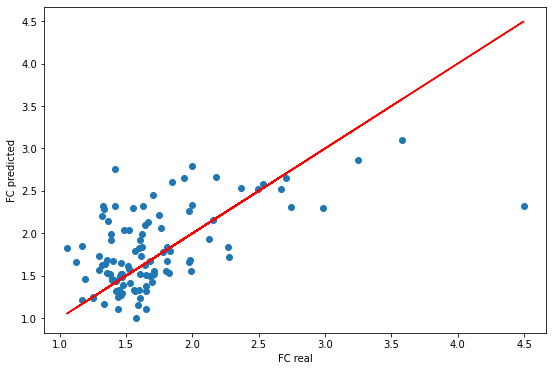

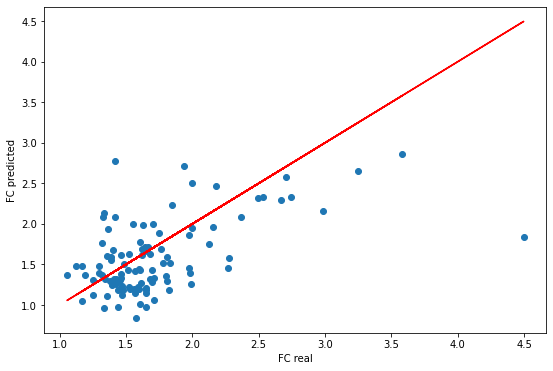

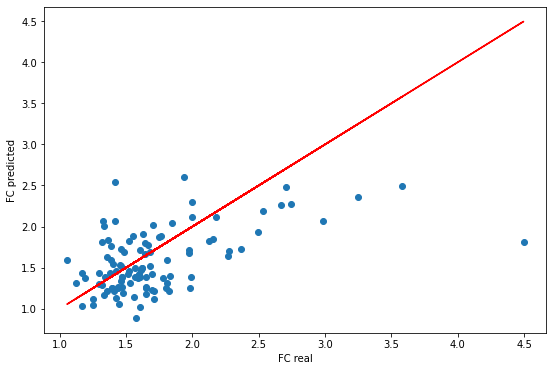

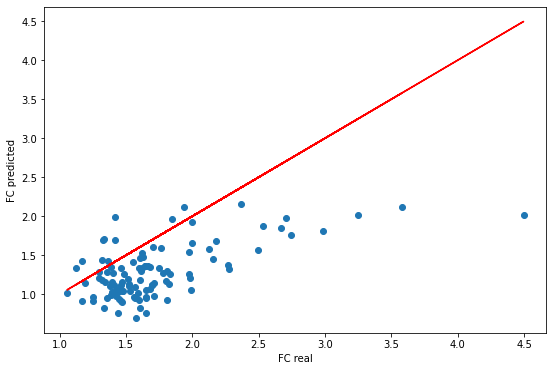

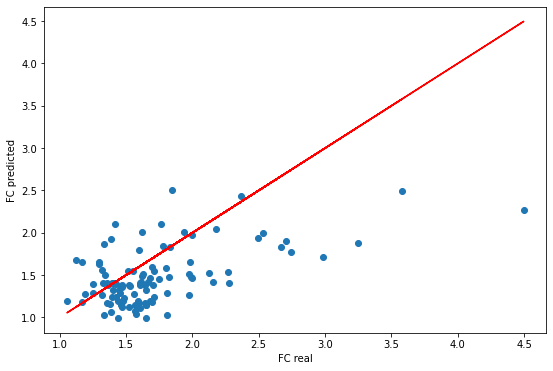

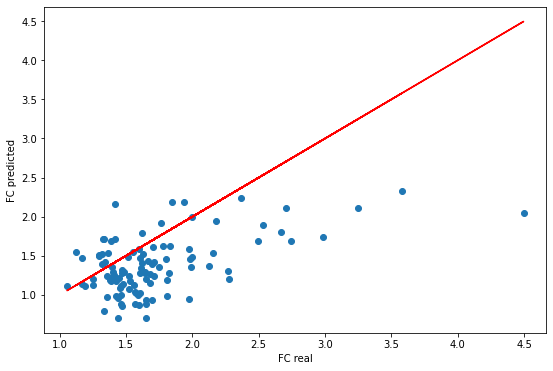

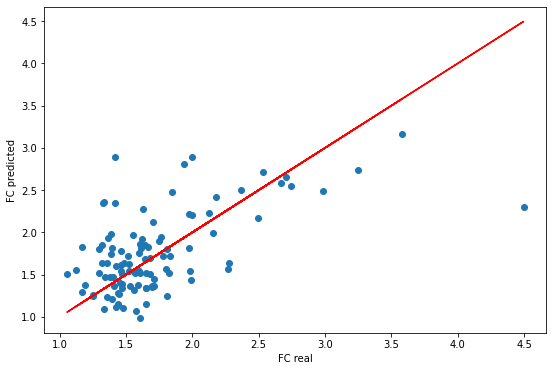

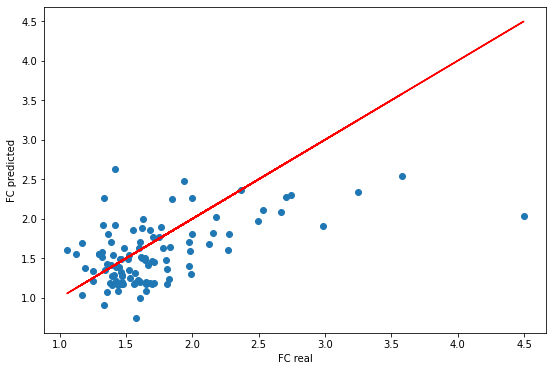

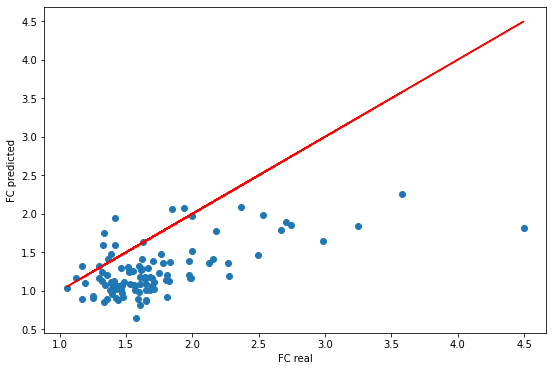

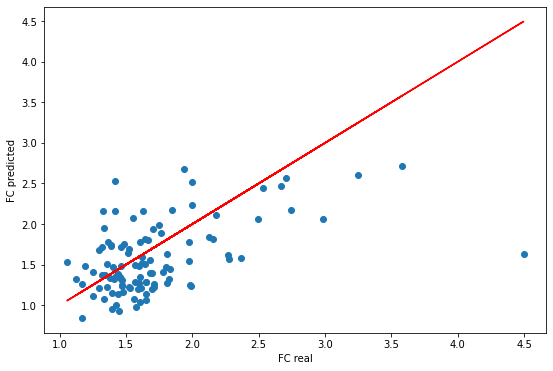

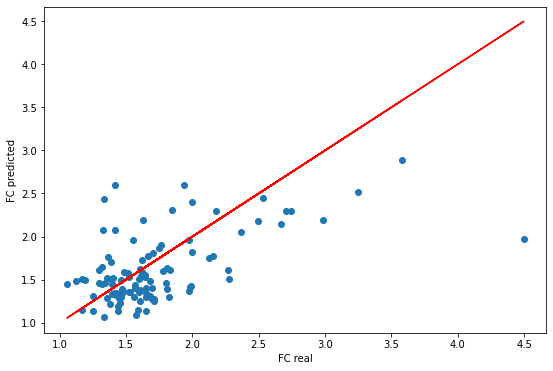

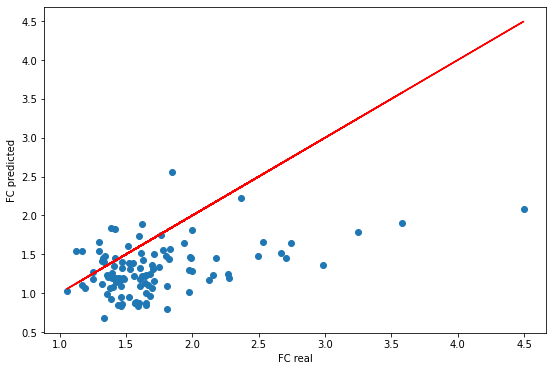

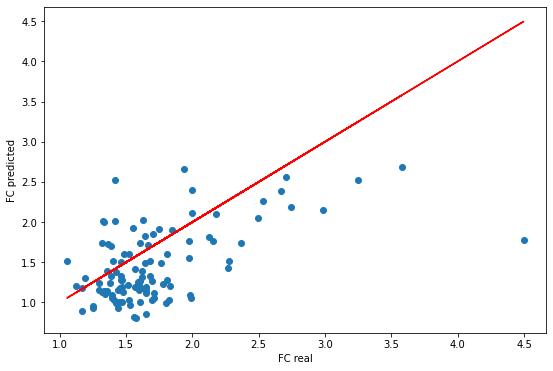

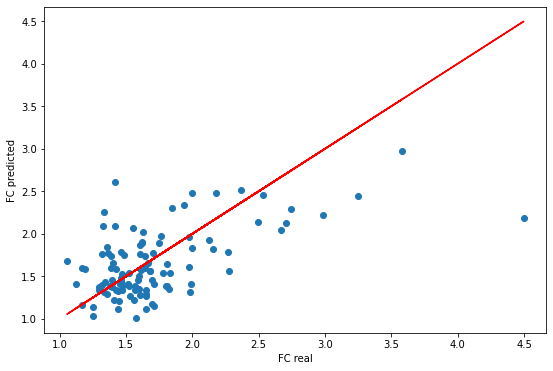

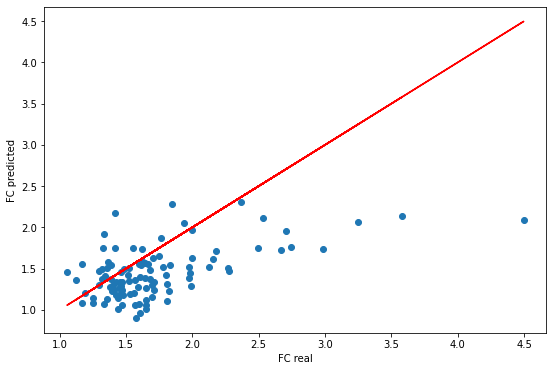

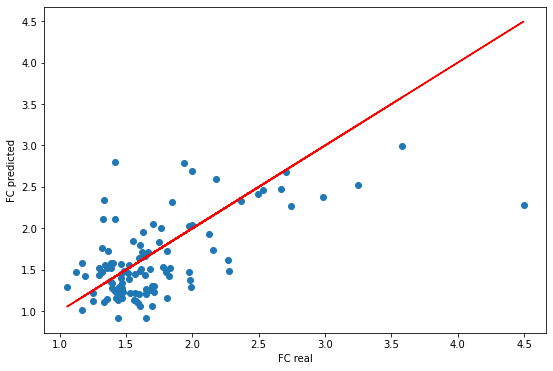

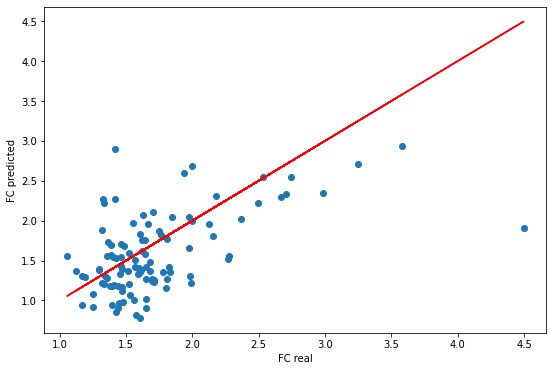

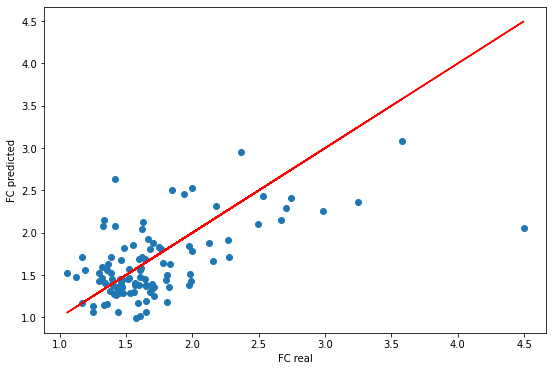

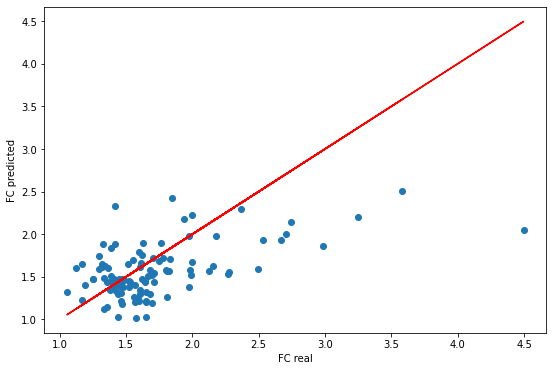

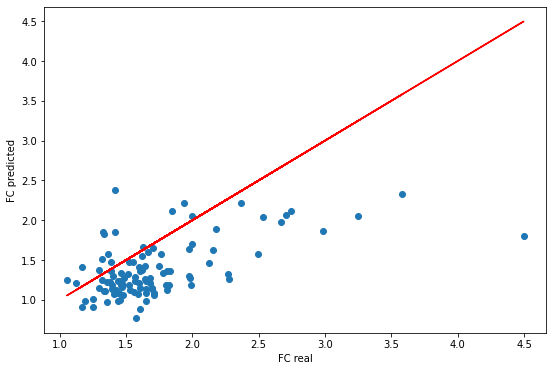

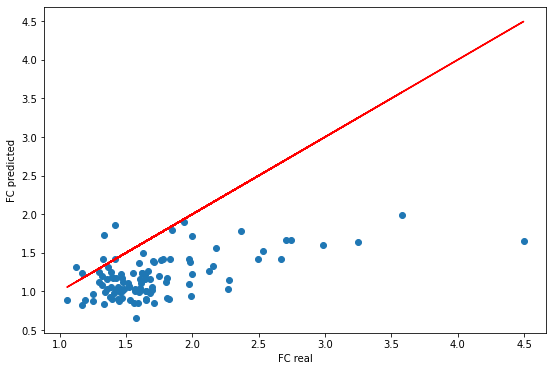

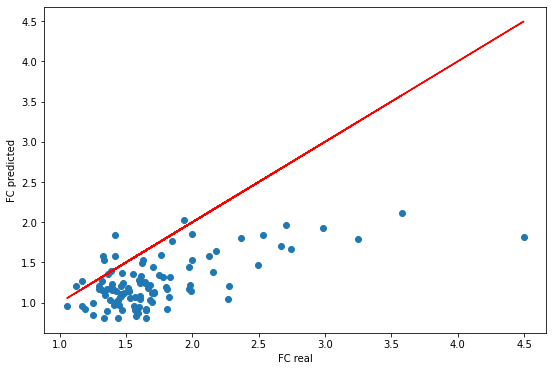

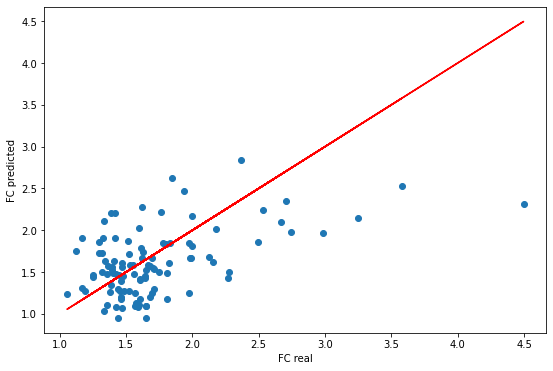

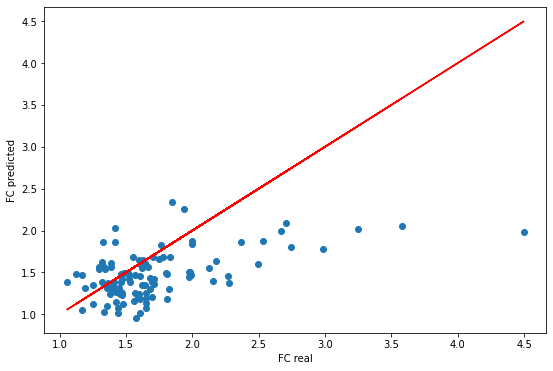

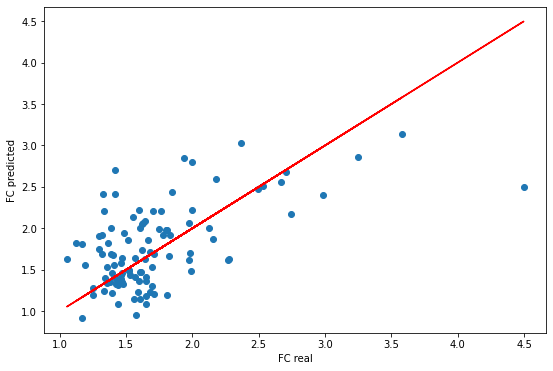

In [115]:
small_model_vars = small_model(full_model,X_train,y_train,X_test,y_test,epochs=150,batch_size=32, iters=40)

In [116]:
small_model_vars

[0.21034146903715523,
 0.2574520181564769,
 0.17876812034632739,
 0.2690067782356055,
 0.32612374491276186,
 0.2705398456307688,
 0.12449254315912917,
 0.31893960486530093,
 0.3451421317147757,
 0.21072008686594523,
 0.33118180228282645,
 0.18336381510364386,
 0.23383399575151842,
 0.13351701271677108,
 0.29183168877501575,
 0.1984056082437099,
 0.20881434225318474,
 0.23494448540699242,
 0.3808597010686221,
 0.3109395040975774,
 0.2622047709802632,
 0.23717741832298578,
 0.24567010750857454,
 0.3742885823789336,
 0.15348761978702286,
 0.2926930465647286,
 0.14075222785914798,
 0.19731468293329368,
 0.30114626178596005,
 0.311310442869554,
 0.2682545851668051,
 0.14167943041727749,
 0.2869909541665213,
 0.2976226398180074,
 0.3202304396818716,
 0.314910193135451,
 0.39483135946782777,
 0.1844037949599585,
 0.28700733177376536,
 0.19753387979370096]

In [117]:
# create a dataframe with small_model_vars and large_model_vars in a single column and with a description of the model in a second column
df_vars = pd.DataFrame({'variance_exp':small_model_vars, 'model':'small model'})
df_vars2 = pd.DataFrame({'variance_exp':large_model_vars, 'model':'large model'})
df_vars = df_vars.append(df_vars2)

/var/folders/xy/wf6xxhnx3hx557yklnkjk7zr0000gn/T/ipykernel_35478/3226283705.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_vars = df_vars.append(df_vars2)


In [118]:
df_vars

,variance_exp,model
0,0.210341,small model
1,0.257452,small model
2,0.178768,small model
3,0.269007,small model
4,0.326124,small model
...,...,...
35,0.096699,large model
36,0.040771,large model
37,0.141780,large model
38,0.157083,large model


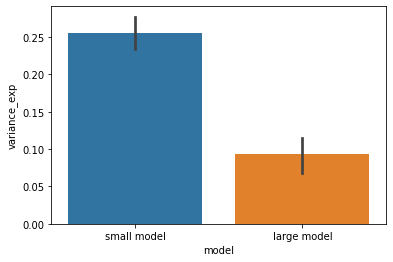

In [119]:
sns.barplot(x='model', y='variance_exp', data=df_vars)
# save the plot as a pdf
plt.savefig('/Users/danmarti/Documents/MRC_postdoc/Pangenomic/pangenome_analysis/ALL/phylo_analysis/PG_ANNs/output/predictions_tf2/variance_exp.pdf')

In [120]:
# save the dataframe into a csv file
df_vars.to_csv('/Users/danmarti/Documents/MRC_postdoc/Pangenomic/pangenome_analysis/ALL/phylo_analysis/PG_ANNs/output/predictions_tf2/variance_exp.csv')

In [121]:
## TODO: create fake lists of random genes and compare its predictive power with the real models
